# Extra Trees Regressor

### Importing the libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Importing the dataset

In [16]:
data = pd.read_csv('../dataset/spotify_features.csv', sep=',')
data.head()

,track_popularity,instrumentalness,duration_ms,energy,acousticness,album_month,danceability,loudness,liveness,genre_code,valence,artist_code,speechiness
0,67.0,0.004210,162600.0,0.815,0.0724,12,0.726,-4.969,0.35700,2,0.693000,4535,0.106983
1,70.0,0.000023,176616.0,0.931,0.0794,7,0.675,-3.432,0.19031,2,0.613000,7724,0.074200
2,60.0,0.000009,169093.0,0.930,0.0287,7,0.718,-3.778,0.20400,2,0.509838,6862,0.102000
3,62.0,0.000000,187675.0,0.856,0.1870,7,0.449,-4.788,0.17600,2,0.152000,3635,0.062300
4,58.0,0.000005,207894.0,0.923,0.1460,6,0.679,-6.500,0.12400,2,0.752000,2056,0.181000


### Data Preprocessing

In [17]:
X = data.drop(columns=['track_popularity'])
y = data['track_popularity']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (11908, 12), (11908,)
Validation set: (3970, 12), (3970,)
Test set: (3970, 12), (3970,)


### Model training

In [18]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('extra_trees_regressor', ExtraTreesRegressor(n_estimators=200, random_state=0))
])

model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('extra_trees_regressor',
                 ExtraTreesRegressor(n_estimators=200, random_state=0))])

### Model evaluation

In [19]:
train_score = model.score(X_train, y_train)
val_score = model.score(X_val, y_val)
test_score = model.score(X_test, y_test)

print(f"Train R^2: {train_score:.2f}")
print(f"Validation R^2: {val_score:.2f}")
print(f"Test R^2: {test_score:.2f}")

mse = mean_squared_error(y_test, model.predict(X_test))
mae = mean_absolute_error(y_test, model.predict(X_test))
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Train R^2: 1.00
Validation R^2: 0.16
Test R^2: 0.14
Mean Squared Error: 495.64
Mean Absolute Error: 17.84


### Cross-validation

In [20]:
scores = cross_validate(model, X, y, cv=6, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,9.139388,0.138058,-0.080798,0.996521
1,9.441715,0.125651,-0.032038,0.996620
2,9.393671,0.152140,-0.039782,0.996694
3,9.310210,0.098777,0.083073,0.996875
4,10.100027,0.088292,-0.144980,0.996800
5,9.543005,0.087348,0.073605,0.996112


### Hyperparameter Tuning

In [21]:
# Define the model pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('extra_trees_regressor', ExtraTreesRegressor(random_state=0))
])

# Define the hyperparameters for tuning
param_grid = {
    'extra_trees_regressor__n_estimators': [100, 200, 300],
    'extra_trees_regressor__max_features': ['sqrt', 'log2'],
    'extra_trees_regressor__min_samples_split': [2, 5, 10],
    'extra_trees_regressor__min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, error_score='raise')
grid_search.fit(X_train, y_train)

# Retrieve and print best parameters
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate the best model on training, validation, and test sets
train_score = best_model.score(X_train, y_train)
val_score = best_model.score(X_val, y_val)
test_score = best_model.score(X_test, y_test)

print(f"Best Model Train R^2: {train_score:.2f}")
print(f"Best Model Validation R^2: {val_score:.2f}")
print(f"Best Model Test R^2: {test_score:.2f}")

# Calculate error metrics
mse = mean_squared_error(y_test, best_model.predict(X_test))
mae = mean_absolute_error(y_test, best_model.predict(X_test))
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

C:\Users\ilian\Documents\School\VirtualEnviromentsPython\artificialIntelligenceProject_2024_2025\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'extra_trees_regressor__max_features': 'sqrt', 'extra_trees_regressor__min_samples_leaf': 1, 'extra_trees_regressor__min_samples_split': 2, 'extra_trees_regressor__n_estimators': 300}
Best Model Train R^2: 1.00
Best Model Validation R^2: 0.18
Best Model Test R^2: 0.15
Mean Squared Error: 491.21
Mean Absolute Error: 17.79


### Cross-validation #2

In [22]:
scores = cross_validate(model, X, y, cv=6, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,9.158463,0.106217,-0.080798,0.996521
1,9.929072,0.086417,-0.032038,0.996620
2,8.959939,0.132434,-0.039782,0.996694
3,8.879070,0.112426,0.083073,0.996875
4,8.761547,0.197955,-0.144980,0.996800
5,9.184127,0.186848,0.073605,0.996112


### Visualizations

#### Feature Importance

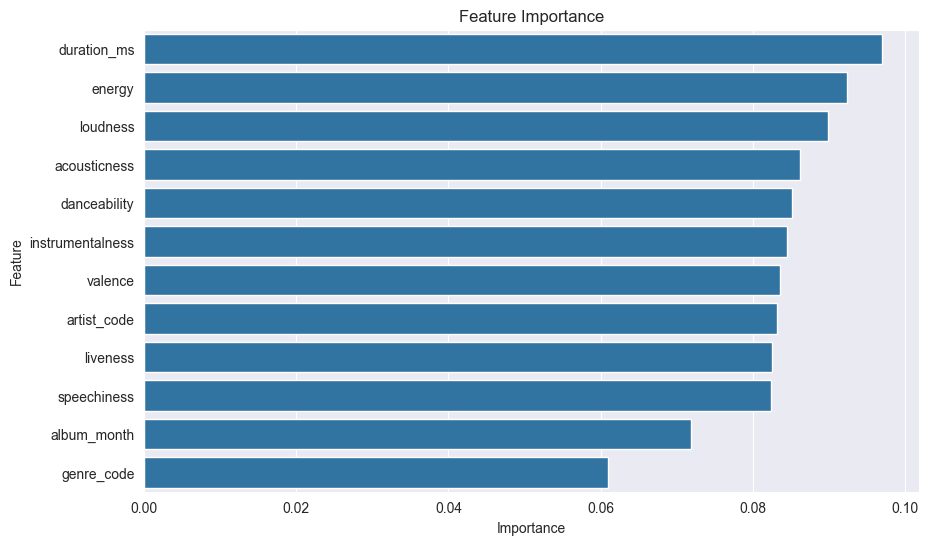

In [23]:
feature_importances = best_model.named_steps['extra_trees_regressor'].feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

#### Predictions vs. True Values

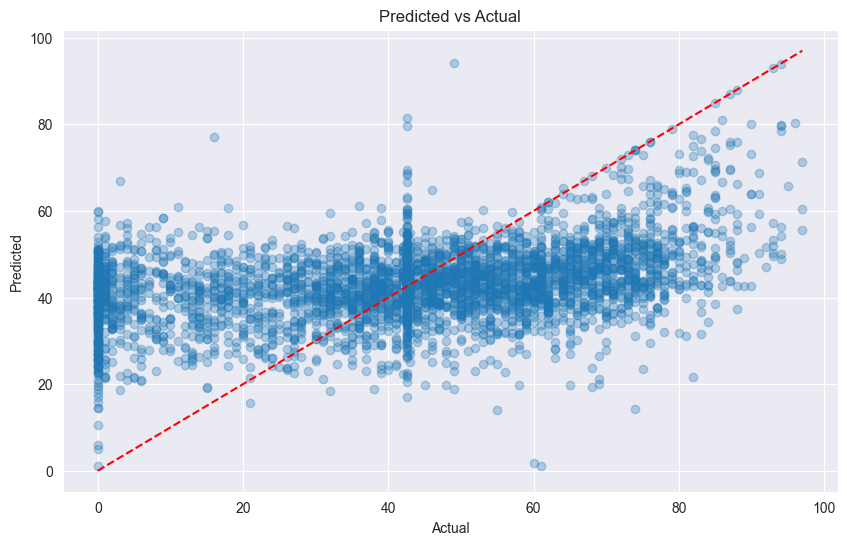

In [24]:
y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()

#### Residuals

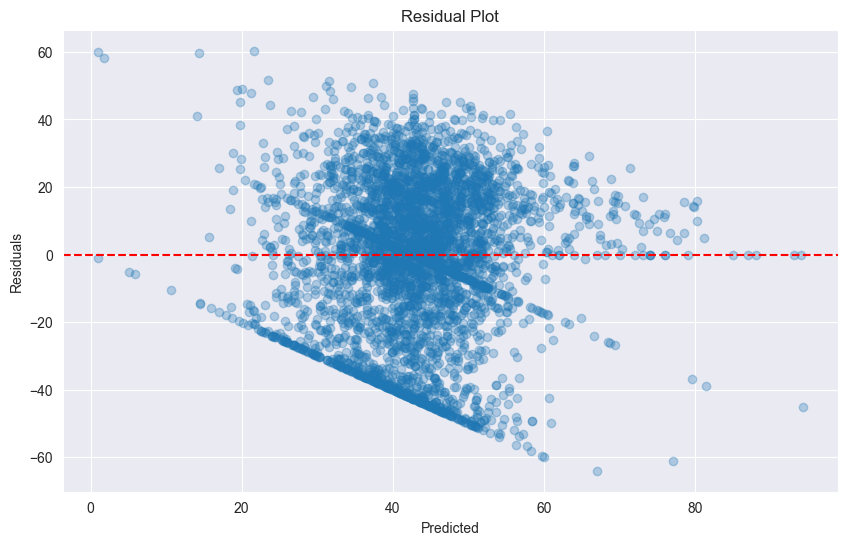

In [25]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()